In [1]:
# put some system-specific variables in the namespace ('le' dict)

    # root path to tvb-library, tvb-data, etc. libraries. 
tvb_folder = '/Users/AmandaE/Documents/tvb_github'

tvb_dat_dir = tvb_folder + '/tvb-data'

#ctx_file = tvb_dat_dir + '/tvb_data/surfaceData/cortex_16384.zip'
#rm_file = tvb_dat_dir  + '/tvb_data/regionMapping/regionMapping_16k_76.bz2'
conn_file = tvb_dat_dir + '/tvb_data/connectivity/connectivity_96.zip'

In [2]:
# Generic imports

import os,sys,glob,h5py,itertools,multiprocessing,\
       numpy as np,pandas as pd
from datetime import datetime
from time import time
from scipy import optimize
from scipy.signal import hilbert
from scipy.sparse import bsr_matrix
from scipy.sparse.linalg import eigs as sp_eigs

# Visualization stuff

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.pyplot import subplot
import matplotlib as mpl
import matplotlib.pyplot as pyplot
import matplotlib.colors
import matplotlib.ticker as ticker
import matplotlib.colors as colors
from matplotlib.tri import Triangulation
from matplotlib import cm
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image,display as d,clear_output
import seaborn as sns

from numpy import pi,cos,sin


/Users/AmandaE/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/AmandaE/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
# TVB stuff

nbso,nbse = sys.stdout,sys.stderr # hack part 1/2 to keep output printing properly
sys.path.append(tvb_folder +'/tvb-library')
sys.path.append(tvb_folder + '/tvb-data')
from tvb.simulator.lab import *
sys.stdout,sys.stderr = nbso,nbse  # ...hack part 2/2

from tvb.datatypes.cortex import Cortex
from tvb.datatypes.region_mapping import RegionMapping
from tvb.datatypes.projections import ProjectionMatrix


from copy import copy # seems that this needs to be done last otherwise it gets 
                      # replaced with numpy copy function

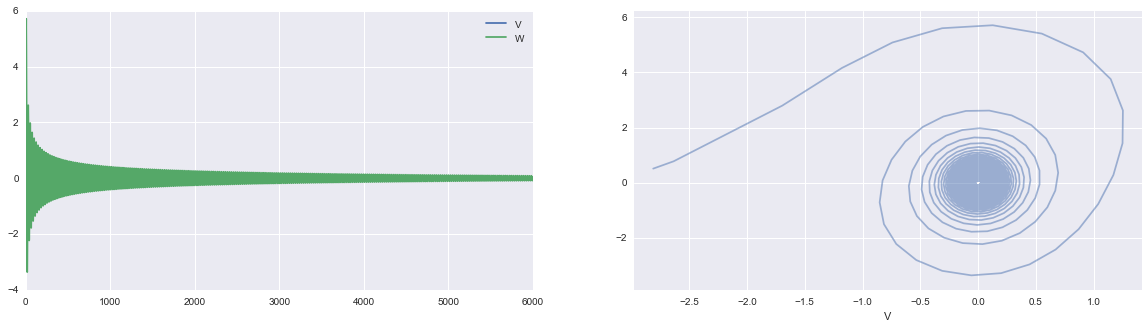

In [35]:
# Run sims

# Specify model with Spiegler parameters

sp_g2do = models.Generic2dOscillator()
# sp_g2do.tau=1.5; 
#sp_g2do.a=0.0; 


gamma_sp = 1.21
epsilon_sp =  12.3083
# is this the correct? 
# - units in Spiegler are S^-1. 
# - default value for g2do d is 0.02
# - so this gives 0.07674
eta_sp = (1/1000.) * 76.74    #eta_sp = 76.74 # 1. # 76.74 ##1. # 76.74 # 1.


# Replicate Spiegler et al.
sp_g2do.c = 0. 
sp_g2do.alpha = 1.
sp_g2do.f = 1.
sp_g2do.gamma = 1.
sp_g2do.tau = 1.
sp_g2do.e = 0.
sp_g2do.a = 0.
sp_g2do.beta = 0.
sp_g2do.d = eta_sp
sp_g2do.b = -epsilon_sp # should not be negative? LOOKS LIKE IT AL COMES DOWN TO THIS PARAM (John's notebook)
        

# Try different values of g
# sp_g2do.g=0.3
sp_g2do.g = -gamma_sp
sp_g2do.g = -0.1


# Evolve system for 1000 sytems, step duration 0.1ms
time,dat = sp_g2do.stationary_trajectory(n_step=60000,dt=0.1)

# Put sim results into a pandas dataframe
V_dat = np.squeeze(dat[:,0,:,:])
W_dat = np.squeeze(dat[:,1,:,:])
df_VW = pd.DataFrame([V_dat,W_dat],
                     index=['V', 'W'], 
                     columns=time).T



# Make 2 quick plots:

# f = outdir + '/pics/single_node_phase_plane_dynamics.png'

fig, ax = plt.subplots(ncols=2, figsize=(20,5))

# V and W vs. time
df_VW.plot(ax=ax[0])

# V vs. W trajectory
ymax = df_VW.W.max() + df_VW.W.std()*1.5
ymin = df_VW.W.min() - df_VW.W.std()*1.5
xmax = df_VW.V.max() + df_VW.V.std()*1.5
xmin = df_VW.V.min() - df_VW.V.std()*1.5
df_VW.plot(x='V', y='W', legend=False,ax=ax[1],
           xlim=[xmin,xmax],ylim=[ymin,ymax],alpha=0.5);



# plt.savefig(f, bbox_inches='tight')
# plt.close()

# Embed in LN
cap = ''; label = 'Single node phase plane dynamics'
#from new_utils import nb_fig,cloudfiles_nb
#im = nb_fig(f,label,cap,cnb,show_fignum=False,size=(800,500))
#d(im)

In [ ]:
models.stefanescu_jirsa.ReducedSetHindmarshRose
np.zeros([1,2,3])[0,:].sum(axis=1)
np.zeros([1,2,3]).shape

In [120]:
models.stefanescu_jirsa.ReducedSetHindmarshRose().stationary_trajectory(np.zeros([1,2,3,4,5]))

TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'